<a href="https://colab.research.google.com/github/krishan30/Lab-01-Feature-Engineering/blob/main/190046E_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the necessary Python libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
import joblib

### Loading the Train & Valid Dataset

In [ ]:
training_data = pd.read_csv('./drive/MyDrive/Lab 1/train.csv')
validation_data = pd.read_csv('./drive/MyDrive/Lab 1/valid.csv')

### Loading Test Dataset

In [ ]:
test_data = pd.read_csv('./drive/MyDrive/Lab 1/test.csv')

### Visualizing Missing Values columns

In [ ]:
def plot_missing_values(data : pd.DataFrame):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]  # Only columns with missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Columns with Missing Values')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values in Columns')
    plt.tight_layout()
    plt.show()


1. In Training Dataset

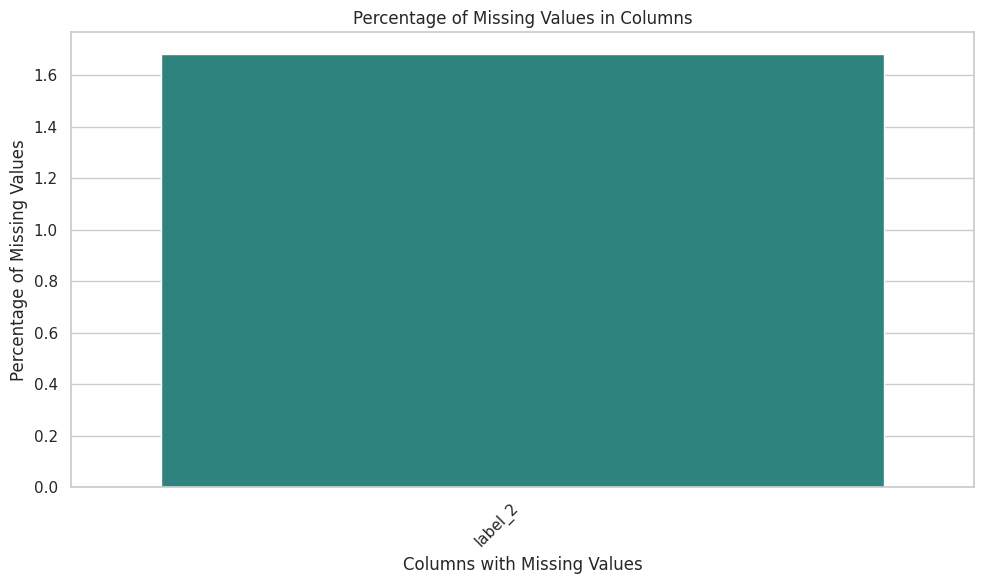

In [ ]:
plot_missing_values(training_data)

2. In validation Dataset

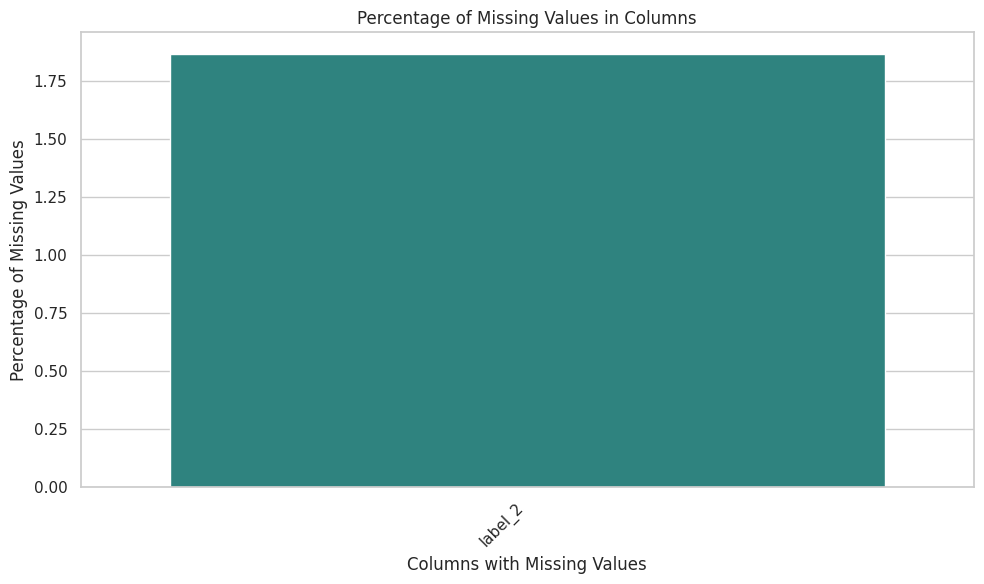

In [ ]:
plot_missing_values(validation_data)

Since Missing Values precentage is very low so rows with empty data will be removed only for label 2 feature dataset

### Check whether unsupported data contain in the dataset (Strings, ...)

1. In Training Dataset

In [ ]:
print(training_data.dtypes.unique())

[dtype('float64') dtype('int64')]


2. In validation Dataset

In [ ]:
print(validation_data.dtypes.unique())

[dtype('float64') dtype('int64')]


3. In Testing Dataset

In [ ]:
print(test_data.dtypes.unique())

[dtype('float64')]


Since there is no `object` type in the datasets so no unsupported data

### Removing Missing Values Only for label 2

In [ ]:
training_data_label_2 = training_data.dropna()
validation_data_label_2 = validation_data.dropna()

### Separate Features and Target Labels from Datasets

In Training Dataset

In [ ]:
# Separate features and target labels
training_features = training_data.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
training_features_label_2 = training_data_label_2.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
training_target_label_1 = training_data['label_1']
training_target_label_2 = training_data_label_2['label_2']
training_target_label_3 = training_data['label_3']
training_target_label_4 = training_data['label_4']


In validation Dataset

In [ ]:
validation_features = validation_data.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
validation_features_label_2 = validation_data_label_2.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
validation_target_label_1 = validation_data['label_1']
validation_target_label_2 = validation_data_label_2['label_2']
validation_target_label_3 = validation_data['label_3']
validation_target_label_4 = validation_data['label_4']

In Testing Dataset

In [ ]:
testing_features = test_data.drop(['label_1', 'label_2','label_3','label_4'], axis=1)

### Visualizing Target Variables (Training)

In [ ]:
def create_histogram(data :pd.DataFrame, title : str, x_label:str, y_label:str, bins=100, color='blue'):
    sns.set(style='whitegrid')  # Set the style
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Create the histogram using Seaborn
    sns.histplot(data, bins=bins, kde=False, color=color)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Label_1

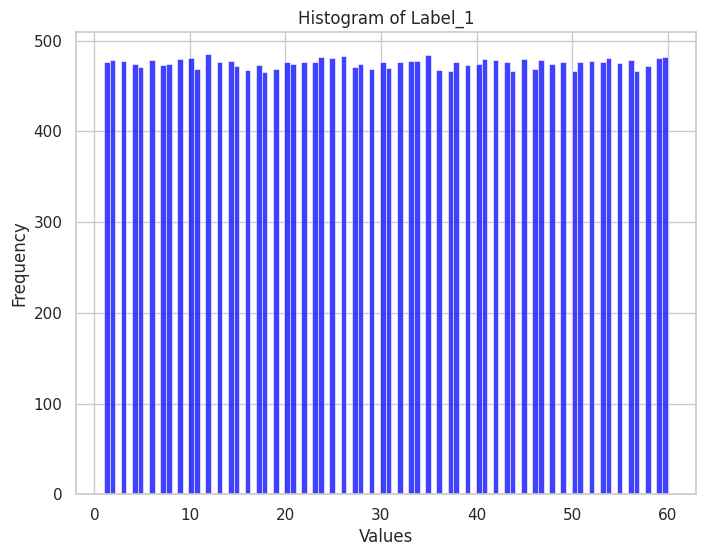

In [ ]:
create_histogram(training_target_label_1,'Histogram of Label_1','Values','Frequency')

Label_2

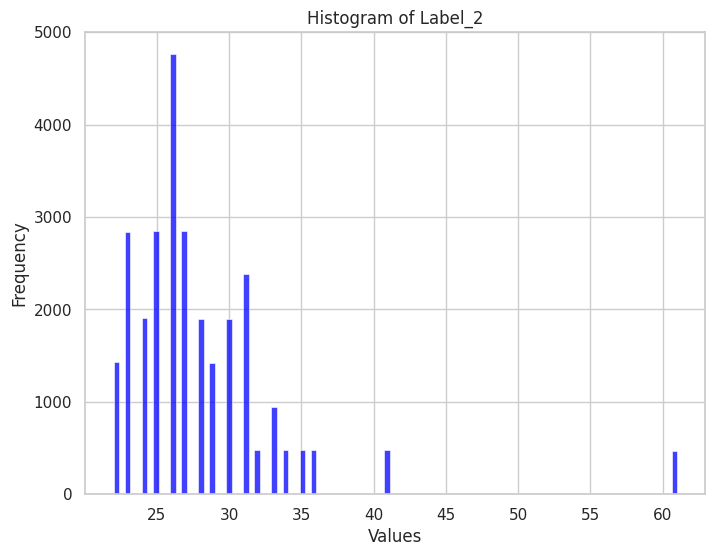

In [ ]:
create_histogram(training_target_label_2,'Histogram of Label_2','Values','Frequency')

Label_3

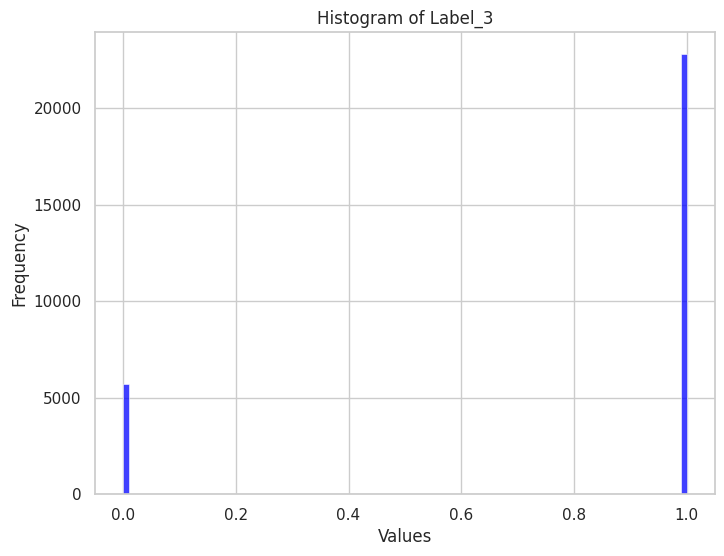

In [ ]:
create_histogram(training_target_label_3,'Histogram of Label_3','Values','Frequency')

Label_4

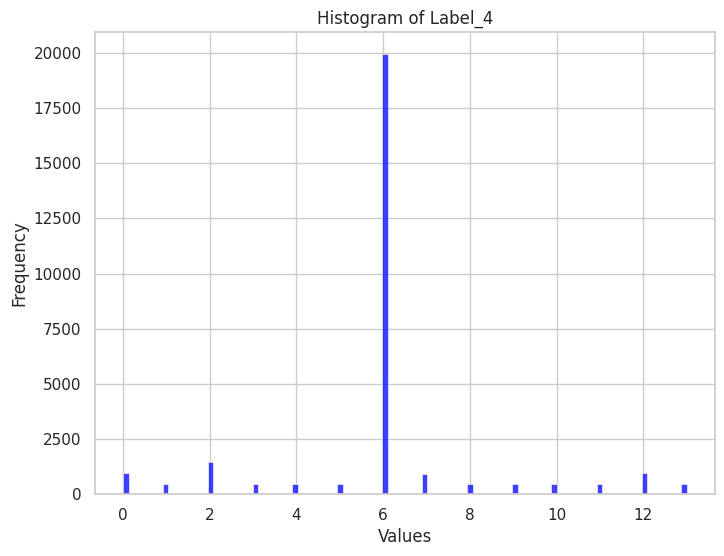

In [ ]:
create_histogram(training_target_label_4,'Histogram of Label_4','Values','Frequency')

Feature 256

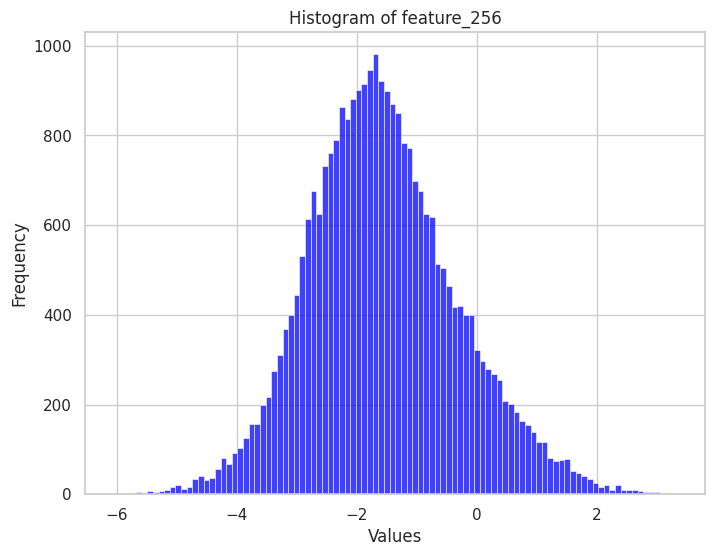

In [ ]:
create_histogram(training_features['feature_256'],'Histogram of feature_256','Values','Frequency')

### Baseline Model Accuracy Before Feature Engineering

In [ ]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, models,average='micro',is_classification=True):
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if is_classification:  # Classification
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='micro')
            recall = recall_score(y_test, y_pred, average='micro')
            print(model_name)
            print(f"Accuracy : {accuracy:.4f}")
            print(f"Precision : {precision:.4f}")
            print(f"Recall : {recall:.4f}")
        else:  # Regression
            # Calculate  RMSE  for the target variable
            RMSE = mean_squared_error(y_test, y_pred,squared=False)
            print(f" RMSE for {model_name}: {RMSE:.4f}")
        print()

1.   Label 1




In [ ]:
# Define a list of models
models_for_label_1 = [
    ('Logistic Regression',LogisticRegression(max_iter=1500)),
    ('SVC' ,SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    #('XGBoost', XGBClassifier()),
]
train_and_evaluate_models(training_features,validation_features,training_target_label_1-1,validation_target_label_1-1,models_for_label_1)

Logistic Regression
Accuracy : 0.9907
Precision : 0.9907
Recall : 0.9907

SVC
Accuracy : 0.9920
Precision : 0.9920
Recall : 0.9920

Random Forest
Accuracy : 0.9680
Precision : 0.9680
Recall : 0.9680



Save the Best model SVC

In [ ]:
#Saving the SVC Model
svc_model = models_for_label_1[1][1]
joblib.dump(svc_model , './drive/MyDrive/Label_1_SVC_Before')

['./drive/MyDrive/Label_1_SVC_Before']


2.   Label 2



In [ ]:
# Define a list of models
models_for_label_2 = [
    ('Linear Regression' ,LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('SVR' ,SVR()),
    ('XGBoost', xgb.XGBRegressor(objective="reg:squarederror", random_state=42))
]
train_and_evaluate_models(training_features_label_2,validation_features_label_2,training_target_label_2,validation_target_label_2,models_for_label_2,is_classification=False)

 RMSE  for Linear Regression: 4.8811

 RMSE  for Random Forest Regressor: 3.5768

 RMSE  for SVR: 4.9233

 RMSE  for XGBoost: 3.2901



Save the Best model XGBoost

In [ ]:
#Saving the XGBoost model
XGBoost_model = models_for_label_2[3][1]
joblib.dump(XGBoost_model , './drive/MyDrive/Label_2_XGBoost_Before')

['./drive/MyDrive/Label_2_XGBoost_Before']

3.   Label 3



In [ ]:
# Define a list of models
models_for_label_3 = [
    ('Logistic Regression',LogisticRegression(class_weight='balanced',max_iter=1000)),
    ('SVC' ,SVC(class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')),
    #('XGBoost', XGBClassifier()),
]
train_and_evaluate_models(training_features,validation_features,training_target_label_3,validation_target_label_3,models_for_label_3,average='weighted')

Logistic Regression
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000

SVC
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000

Random Forest
Accuracy : 0.9947
Precision : 0.9947
Recall : 0.9947



Save the Best model SVC

In [ ]:
#Saving the SVC model
SVC_model = models_for_label_3[1][1]
joblib.dump(SVC_model, './drive/MyDrive/Label_3_SVC_Before')

['./drive/MyDrive/Label_3_SVC_Before']

4. Label 4




In [ ]:
# Define a list of models
models_for_label_4 = [
    ('Logistic Regression',LogisticRegression(class_weight='balanced',max_iter=2000)),
    ('SVC' ,SVC(class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')),
    #('XGBoost', XGBClassifier()),
]
train_and_evaluate_models(training_features,validation_features,training_target_label_4,validation_target_label_4,models_for_label_4,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy : 0.9160
Precision : 0.9160
Recall : 0.9160

SVC
Accuracy : 0.9800
Precision : 0.9800
Recall : 0.9800

Random Forest
Accuracy : 0.8427
Precision : 0.8427
Recall : 0.8427



Save the Best model SVC

In [ ]:
#Saving the SVC model
SVC_model = models_for_label_4[1][1]
joblib.dump(SVC_model, './drive/MyDrive/Label_4_SVC_Before')

['./drive/MyDrive/Label_4_SVC_Before']

### Dimensionality Reduction using PCA for Label 1,3,4

Standardize the features in training,validation & Testing

In [ ]:
# Standardize the features
scaler = RobustScaler()
standardized_features = scaler.fit_transform(training_features)
standardized_valid_features = scaler.transform(validation_features)
standardized_test_features = scaler.transform(testing_features)

Generating the PCA components in training,validation & Testing

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
pca_components_training = pca.fit_transform(standardized_features)
pca_components_validation = pca.transform(standardized_valid_features)
pca_components_testing = pca.transform(standardized_test_features )

New number of Features for Label 1,3,4 :

In [ ]:
pca_components_training.shape[1]

67

### Dimensionality Reduction using PCA for Label 2

In [ ]:
# Standardize the features
scaler = RobustScaler()
standardized_features_label_2 = scaler.fit_transform(training_features_label_2)
standardized_valid_features_lable_2 = scaler.transform(validation_features_label_2)

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
pca_components_training_label_2 = pca.fit_transform(standardized_features_label_2)
pca_components_validation_label_2 = pca.transform(standardized_valid_features_lable_2)

New number of Features for Label 2:

In [ ]:
pca_components_training_label_2.shape[1]

67

### Baseline Model Accuracy After Feature Engineering

1. Label 1



In [ ]:
# Define a list of models
models_for_label_1 = [
    ('Logistic Regression',LogisticRegression(max_iter=1500)),
    ('SVC' ,SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    #('XGBoost', XGBClassifier()),
]
train_and_evaluate_models(pca_components_training,pca_components_validation,training_target_label_1-1,validation_target_label_1-1,models_for_label_1)

Logistic Regression
Accuracy : 0.9680
Precision : 0.9680
Recall : 0.9680

SVC
Accuracy : 0.9920
Precision : 0.9920
Recall : 0.9920

Random Forest
Accuracy : 0.9680
Precision : 0.9680
Recall : 0.9680



Save the Best model SVC

In [ ]:
#Saving the SVC model
SVC_model = models_for_label_1[1][1]
joblib.dump(SVC_model, './drive/MyDrive/Label_1_SVC_After')

['./drive/MyDrive/Label_1_SVC_After']

2. Label 2

In [ ]:
# Define a list of models
models_for_label_2 = [
    ('Linear Regression' ,LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('SVR' ,SVR()),
    ('XGBoost', xgb.XGBRegressor(objective="reg:squarederror", random_state=42))
]
train_and_evaluate_models(pca_components_training_label_2,pca_components_validation_label_2,training_target_label_2,validation_target_label_2,models_for_label_2,is_classification=False)

 RMSE  for Linear Regression: 5.5545

 RMSE  for Random Forest Regressor: 3.6826

 RMSE  for SVR: 4.3847

 RMSE  for XGBoost: 3.5984



Save the Best model XGBoost

In [ ]:
#Saving the XGBoost model
XGBoost_model = models_for_label_2[3][1]
joblib.dump(XGBoost_model, './drive/MyDrive/Label_2_XGBoost_After')

['./drive/MyDrive/Label_2_XGBoost_After']

3. Label 3

In [ ]:
# Define a list of models
models_for_label_3 = [
    ('Logistic Regression',LogisticRegression(class_weight='balanced',max_iter=1000)),
    ('SVC' ,SVC(class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')),
    #('XGBoost', XGBClassifier()),
]
train_and_evaluate_models(pca_components_training,pca_components_validation,training_target_label_3,validation_target_label_3,models_for_label_3,average='weighted')

Logistic Regression
Accuracy : 0.9987
Precision : 0.9987
Recall : 0.9987

SVC
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000

Random Forest
Accuracy : 0.9947
Precision : 0.9947
Recall : 0.9947



Save the Best model SVC

In [ ]:
#Saving the SVC model
SVC_model = models_for_label_3[1][1]
joblib.dump(SVC_model, './drive/MyDrive/Label_3_SVC_After')

['./drive/MyDrive/Label_3_SVC_After']

4. Label 4

In [ ]:
# Define a list of models
models_for_label_4 = [
    ('Logistic Regression',LogisticRegression(class_weight='balanced',max_iter=2000)),
    ('SVC' ,SVC(class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')),
    #('XGBoost', XGBClassifier()),
]
train_and_evaluate_models(pca_components_training,pca_components_validation,training_target_label_4,validation_target_label_4,models_for_label_4,average='weighted')

Logistic Regression
Accuracy : 0.7307
Precision : 0.7307
Recall : 0.7307

SVC
Accuracy : 0.9827
Precision : 0.9827
Recall : 0.9827

Random Forest
Accuracy : 0.8173
Precision : 0.8173
Recall : 0.8173



Save the Best model SVC

In [ ]:
#Saving the SVC model
SVC_model = models_for_label_4[1][1]
joblib.dump(SVC_model, './drive/MyDrive/Label_4_SVC_After')

['./drive/MyDrive/Label_4_SVC_After']

### Load the Saved Model

1. Before Feature Engineering models

In [ ]:
label_1_before_model = joblib.load('./drive/MyDrive/Label_1_SVC_Before')
label_2_before_model = joblib.load('./drive/MyDrive/Label_2_XGBoost_Before')
label_3_before_model = joblib.load('./drive/MyDrive/Label_3_SVC_Before')
label_4_before_model = joblib.load('./drive/MyDrive/Label_4_SVC_Before')

2. After Feature Engineering models

In [ ]:
label_1_after_model = joblib.load('./drive/MyDrive/Label_1_SVC_After')
label_2_after_model = joblib.load('./drive/MyDrive/Label_2_XGBoost_After')
label_3_after_model = joblib.load('./drive/MyDrive/Label_3_SVC_After')
label_4_after_model = joblib.load('./drive/MyDrive/Label_4_SVC_After')

# Testing the Best Models with Test Data

In [ ]:
def test_models(X_test,model):
        y_pred = model.predict(X_test)
        return y_pred

## 1. Testing baseline models before feature engineering


---



1. For Label 1

In [ ]:
test_predictions_label_1_before=test_models(testing_features,label_1_before_model)

2. For Label 2

In [ ]:
test_predictions_label_2_before=test_models(testing_features,label_2_before_model)

3. For Label 3

In [ ]:
test_predictions_label_3_before=test_models(testing_features,label_3_before_model)

4. For Label 4

In [ ]:
test_predictions_label_4_before=test_models(testing_features,label_4_before_model)

## 2. Testing new models after feature engineering



---





1. For Label 1

In [ ]:
test_predictions_label_1_after=test_models(pca_components_testing,label_1_after_model)

2. For Label 2

In [ ]:
test_predictions_label_2_after=test_models(pca_components_testing,label_2_after_model)

3. For Label 3

In [ ]:
test_predictions_label_3_after=test_models(pca_components_testing,label_3_after_model)

4. For Label 4

In [ ]:
test_predictions_label_4_after=test_models(pca_components_testing,label_4_after_model)

# Creating The Required CSV File

In [ ]:
def create_required_CSV_file(new_features,y_prediction_before,y_prediction_after,file_name):
  # Create column names with "new_feature_" prefix
  num_rows = new_features.shape[0]
  num_features = new_features.shape[1]
  column_names = [f'new_feature_{i+1}' for i in range(num_features)]
  feature_df= pd.DataFrame(data=new_features,columns=column_names)
  remaining_coloumns = [f'new_feature_{i+1}' for i in range(num_features,256)]
  remaining_coloumns_df =pd.DataFrame(columns=remaining_coloumns)
  feature_df=pd.concat([feature_df,remaining_coloumns_df],axis=1)
  y_pred_before_df=pd.DataFrame(data=y_prediction_before,columns=['Predicted labels before feature engineering'])
  y_pred_after_df=pd.DataFrame(data=y_prediction_after,columns=['Predicted labels after feature engineering'])
  num_feature_arr=([num_features]* num_rows)
  num_features_df=pd.DataFrame(data=num_feature_arr,columns=['No of new features'])
  # Concatenate the DataFrames vertically (along rows)
  final_df = pd.concat([y_pred_before_df, y_pred_after_df, num_features_df,feature_df],axis=1)
  final_df.to_csv(file_name, index=False)


In [ ]:
create_required_CSV_file(pca_components_testing,test_predictions_label_1_before+1,test_predictions_label_1_after+1,"./190046E_label_1.csv") #classes were zreo indexed added 1

In [ ]:
create_required_CSV_file(pca_components_testing,test_predictions_label_2_before,test_predictions_label_2_after,"./190046E_label_2.csv")

In [ ]:
create_required_CSV_file(pca_components_testing,test_predictions_label_3_before,test_predictions_label_3_after,"./190046E_label_3.csv")

In [ ]:
create_required_CSV_file(pca_components_testing,test_predictions_label_4_before,test_predictions_label_4_after,"./190046E_label_4.csv")